In [1]:
# SE REALIZA PREDICCIÓN DE REGRESIÓN LINEAL SIMPLE PARA CALCULAR GENERACIÓN DE RESIDUOS HASTA EL AÑO 2035 DE ESPAÑA.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Librería de visualización de datos en 2D y Pyplot es una interfaz para crear gráficos.
import seaborn as sns # Librería de visualización de datos basada en matplotlib.
from pandas.plotting import scatter_matrix # Crear una matriz de dispersión que muestra gráficos de dispersión 
from sklearn.linear_model import LinearRegression # Librería de aprendizaje automático (machine learning).



In [3]:
# DATAFRAME PARA EL DATASET DE LOS DATOS LIMPIOS DE ESP. 
df = pd.read_csv('Dataset_ESP_Limpio.csv')

In [4]:
df.head(1)

,Año,Población España,Total Generado España,Total Recogida Selectiva,Total Resto,RS / RE % Total,FR / RE % Total
0,2012,46818219,21896335,6522002,15374333,29.79,70.21


array([[<AxesSubplot:xlabel='Año', ylabel='Año'>,
        <AxesSubplot:xlabel='Población España', ylabel='Año'>,
        <AxesSubplot:xlabel='Total Generado España', ylabel='Año'>,
        <AxesSubplot:xlabel='Total Recogida Selectiva', ylabel='Año'>,
        <AxesSubplot:xlabel='Total Resto', ylabel='Año'>,
        <AxesSubplot:xlabel='RS / RE % Total', ylabel='Año'>,
        <AxesSubplot:xlabel='FR / RE % Total', ylabel='Año'>],
       [<AxesSubplot:xlabel='Año', ylabel='Población España'>,
        <AxesSubplot:xlabel='Población España', ylabel='Población España'>,
        <AxesSubplot:xlabel='Total Generado España', ylabel='Población España'>,
        <AxesSubplot:xlabel='Total Recogida Selectiva', ylabel='Población España'>,
        <AxesSubplot:xlabel='Total Resto', ylabel='Población España'>,
        <AxesSubplot:xlabel='RS / RE % Total', ylabel='Población España'>,
        <AxesSubplot:xlabel='FR / RE % Total', ylabel='Población España'>],
       [<AxesSubplot:xlabel='Año', ylab

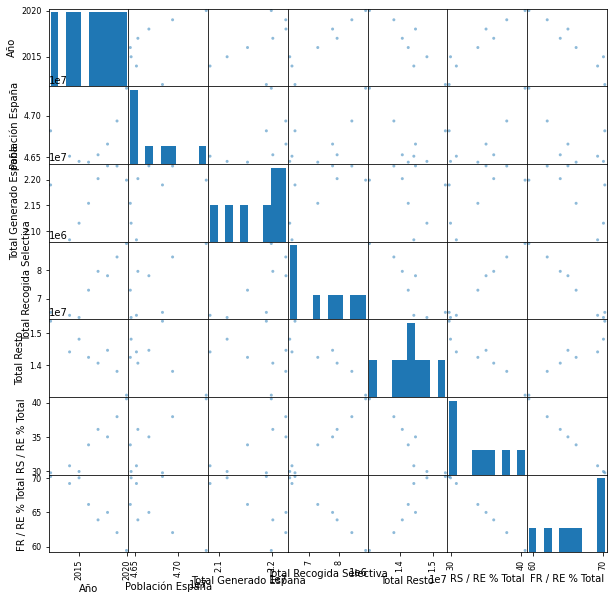

In [5]:
# MATRIZ SCATTERPLOTS CRUZADOS DE LAS VARIABLES CON HISTROGRAMA.
# Matriz simétrica. 
scatter_matrix(df, figsize = (10,10))

<AxesSubplot:>

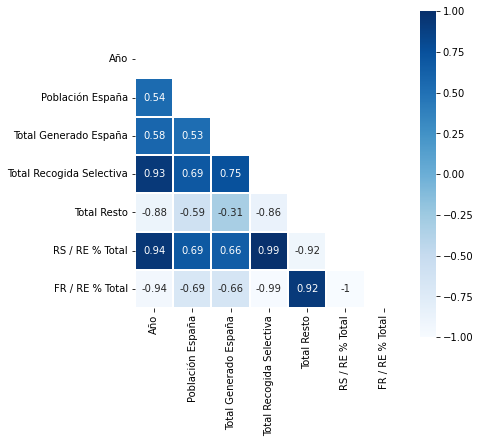

In [6]:
# MATRIZ CORRELACIÓN CON MAPA DE CALOR.
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0, square=True, linewidths=.1, annot= True)

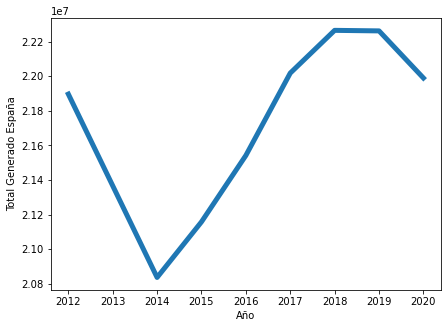

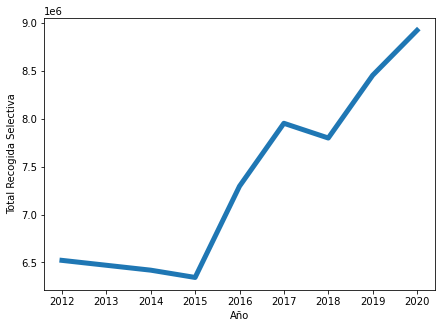

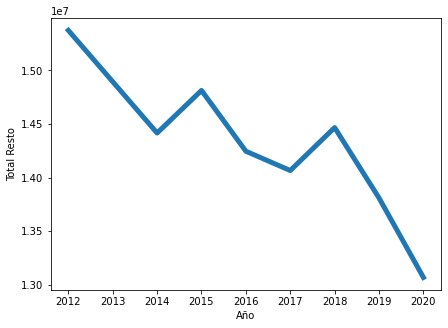

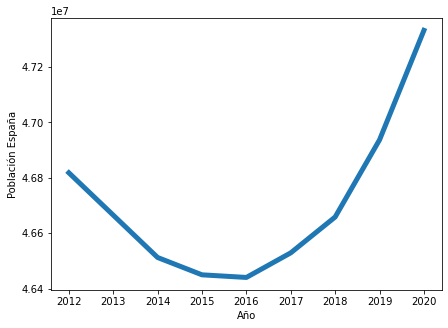

In [7]:
# ANALIZAMOS LOS DATOS EN GRÁFICA LINEAL POR AÑOS.
list_to_plot = ['Total Generado España','Total Recogida Selectiva','Total Resto','Población España']
for i in list_to_plot:
    fig, ax = plt.subplots(figsize=(7,5))
    sns.lineplot(data = df, y=i, x = 'Año', linewidth =5)
    plt.show()

In [8]:
# Correlación de Pearson es una medida común de la correlación lineal. Varía entre -1 y
# +1, donde -1 indica una correlación negativa perfecta, +1 indica una correlación positiva perfecta, y 0
# indica ninguna correlación.

correlation_matrix = df.corr()
print(correlation_matrix)

                               Año  Población España  Total Generado España  \
Año                       1.000000          0.539852               0.578141   
Población España          0.539852          1.000000               0.529927   
Total Generado España     0.578141          0.529927               1.000000   
Total Recogida Selectiva  0.925357          0.694311               0.747074   
Total Resto              -0.883701         -0.589644              -0.306259   
RS / RE % Total           0.937538          0.685780               0.656220   
FR / RE % Total          -0.937538         -0.685780              -0.656220   

                          Total Recogida Selectiva  Total Resto  \
Año                                       0.925357    -0.883701   
Población España                          0.694311    -0.589644   
Total Generado España                     0.747074    -0.306259   
Total Recogida Selectiva                  1.000000    -0.861597   
Total Resto                     

In [9]:
df2 = df.drop(['RS / RE % Total','FR / RE % Total'], axis=1)
correlation_matrix = df2.corr()
print(correlation_matrix)

                               Año  Población España  Total Generado España  \
Año                       1.000000          0.539852               0.578141   
Población España          0.539852          1.000000               0.529927   
Total Generado España     0.578141          0.529927               1.000000   
Total Recogida Selectiva  0.925357          0.694311               0.747074   
Total Resto              -0.883701         -0.589644              -0.306259   

                          Total Recogida Selectiva  Total Resto  
Año                                       0.925357    -0.883701  
Población España                          0.694311    -0.589644  
Total Generado España                     0.747074    -0.306259  
Total Recogida Selectiva                  1.000000    -0.861597  
Total Resto                              -0.861597     1.000000  


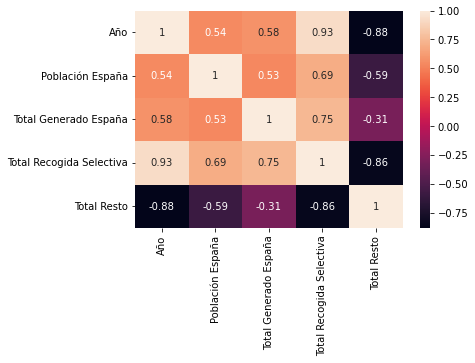

In [10]:
#MAPA DE CALOR SIMPLIFICADO.
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [11]:
# CREACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE PARA LOS AÑOS DEL 2021-2035, PARTIENDO DE LOS DATOS DEL 2012-2020 OFICIALES. 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Datos históricos del DataFrame existente
years = df['Año'].tolist()
poblacion = df['Población España'].tolist()
total_generado = df['Total Generado España'].tolist()
total_recogida_selectiva = df['Total Recogida Selectiva'].tolist()
total_resto = df['Total Resto'].tolist()

# Convertir los datos a matrices numpy
X = np.array(years).reshape(-1, 1)
y_poblacion = np.array(poblacion)
y_total_generado = np.array(total_generado)
y_total_recogida_selectiva = np.array(total_recogida_selectiva)
y_total_resto = np.array(total_resto)

# Crear el modelo de regresión lineal para cada una de las variables
reg_poblacion = LinearRegression()
reg_total_generado = LinearRegression()
reg_total_recogida_selectiva = LinearRegression()
reg_total_resto = LinearRegression()

# Entrenar el modelo para cada variable
reg_poblacion.fit(X, y_poblacion)
reg_total_generado.fit(X, y_total_generado)
reg_total_recogida_selectiva.fit(X, y_total_recogida_selectiva)
reg_total_resto.fit(X, y_total_resto)

# Predicción para los años futuros (2021 - 2035)
future_years = range(2021, 2036)
predicted_poblacion = reg_poblacion.predict(np.array(future_years).reshape(-1, 1))
predicted_total_generado = reg_total_generado.predict(np.array(future_years).reshape(-1, 1))
predicted_total_recogida_selectiva = reg_total_recogida_selectiva.predict(np.array(future_years).reshape(-1, 1))
predicted_total_resto = reg_total_resto.predict(np.array(future_years).reshape(-1, 1))

# Crear un DataFrame con los datos históricos y las predicciones
data_prediccion_esp = {
    'Año': years + list(future_years),
    'Población España': poblacion + list(map(int, predicted_poblacion)),
    'Total Generado España': total_generado + list(map(int, predicted_total_generado)),
    'Total Recogida Selectiva': total_recogida_selectiva + list(map(int, predicted_total_recogida_selectiva)),
    'Total Resto': total_resto + list(map(int, predicted_total_resto))
}
df_prediccion = pd.DataFrame(data_prediccion_esp)

# Mostrar el nuevo dataset
df_prediccion.tail()


,Año,Población España,Total Generado España,Total Recogida Selectiva,Total Resto
18,2031,47622104,23398592,12423861,10974730
19,2032,47684495,23511606,12763100,10748505
20,2033,47746885,23624621,13102339,10522280
21,2034,47809276,23737635,13441577,10296054
22,2035,47871666,23850649,13780816,10069829


In [12]:
# CALCULAR EL ERROR CUADRÁTICO MEDIO Y EL COEFICIENTE DE DETERMINACIÓN R PARA EVALUAR LOS MODELOS. 
from sklearn.metrics import r2_score, mean_squared_error

# Calcular el coeficiente de determinación (R^2)
r2_poblacion = r2_score(y_poblacion, reg_poblacion.predict(X))
r2_generado = r2_score(y_total_generado, reg_total_generado.predict(X))
r2_recogida_selectiva = r2_score(y_total_recogida_selectiva, reg_total_recogida_selectiva.predict(X))
r2_resto = r2_score(y_total_resto, reg_total_resto.predict(X))

# Calcular el error cuadrático medio (MSE)
mse_poblacion = mean_squared_error(y_poblacion, reg_poblacion.predict(X))
mse_generado = mean_squared_error(y_total_generado, reg_total_generado.predict(X))
mse_recogida_selectiva = mean_squared_error(y_total_recogida_selectiva, reg_total_recogida_selectiva.predict(X))
mse_resto = mean_squared_error(y_total_resto, reg_total_resto.predict(X))

# Obtener los coeficientes de la regresión lineal
coeficientes_poblacion = reg_poblacion.coef_[0]
coeficientes_generado = reg_total_generado.coef_[0]
coeficientes_recogida_selectiva = reg_total_recogida_selectiva.coef_[0]
coeficientes_resto = reg_total_resto.coef_[0]

# Obtener los términos independientes
intercepto_poblacion = reg_poblacion.intercept_
intercepto_generado = reg_total_generado.intercept_
intercepto_recogida_selectiva = reg_total_recogida_selectiva.intercept_
intercepto_resto = reg_total_resto.intercept_

# Mostrar los resultados
print("Variance score/Estadística R2 se refiere al coeficiente de determinación (R^2), que indica la proporción de la varianza en la variable dependiente que puede ser explicada por el modelo de regresión. Este valor oscila entre 0 y 1, donde 1 indica un ajuste perfecto.")
print("Variance score Población: %.2f" % r2_poblacion)
print("Variance score Total Generado: %.2f" % r2_generado)
print("Variance score Recogida Selectiva: %.2f" % r2_recogida_selectiva)
print("Variance score Resto: %.2f" % r2_resto)
print()

print("Error cuadrático medio se refiere al error cuadrático medio (MSE) del modelo de regresión. El MSE representa la diferencia promedio entre los valores observados y los valores predichos por el modelo. En este caso, el valor del MSE es 'x', lo que indica que, en promedio, el modelo tiene un error cuadrático medio de 'x'")
print("Error cuadrático medio Población:", mse_poblacion)
print("Error cuadrático medio Total Generado:", mse_generado)
print("Error cuadrático medio Recogida Selectiva:", mse_recogida_selectiva)
print("Error cuadrático medio Resto:", mse_resto)
print()

print("Coeficiente de la regresión lineal. En este caso, hay un solo coeficiente que tiene un valor 'x'. Esto significa que, en el modelo de regresión lineal, por cada unidad de cambio en la variable independiente, se espera un aumento de aproximadamente 'x' en la variable dependiente.")
print("Coeficientes Población:", coeficientes_poblacion)
print("Coeficientes Total Generado:", coeficientes_generado)
print("Coeficientes Recogida Selectiva:", coeficientes_recogida_selectiva)
print("Coeficientes Resto:", coeficientes_resto)
print()

print("Término independiente es el término independiente o constante en la regresión lineal. En este caso, el valor es 'x'. Esta constante indica el valor esperado de la variable dependiente cuando todas las variables independientes son cero.")
print("Término independiente Población:", intercepto_poblacion)
print("Término independiente Total Generado:", intercepto_generado)
print("Término independiente Recogida Selectiva:", intercepto_recogida_selectiva)
print("Término independiente Resto:",intercepto_resto)


Variance score/Estadística R2 se refiere al coeficiente de determinación (R^2), que indica la proporción de la varianza en la variable dependiente que puede ser explicada por el modelo de regresión. Este valor oscila entre 0 y 1, donde 1 indica un ajuste perfecto.
Variance score Población: 0.29
Variance score Total Generado: 0.33
Variance score Recogida Selectiva: 0.86
Variance score Resto: 0.78

Error cuadrático medio se refiere al error cuadrático medio (MSE) del modelo de regresión. El MSE representa la diferencia promedio entre los valores observados y los valores predichos por el modelo. En este caso, el valor del MSE es 'x', lo que indica que, en promedio, el modelo tiene un error cuadrático medio de 'x'
Error cuadrático medio Población: 59000346660.35303
Error cuadrático medio Total Generado: 158600200051.609
Error cuadrático medio Recogida Selectiva: 120415851225.63696
Error cuadrático medio Resto: 89505872272.72922

Coeficiente de la regresión lineal. En este caso, hay un solo

In [13]:
# SE AGREGAN 2 NUEVAS COLUMNAS Y SE CAMBIAN LOS NOMBRES DE LAS COLUMNAS.
df_prediccion = df_prediccion.assign(RS_RC_porcentaje_total=(df_prediccion['Total Recogida Selectiva'] /df_prediccion['Total Generado España']) * 100).round(2)
df_prediccion = df_prediccion.assign(FR_RC_porcentaje_total=(df_prediccion['Total Resto'] / df_prediccion['Total Generado España']) * 100).round(2)
df_prediccion.rename(columns={'RS_RC_porcentaje_total':'RS / RE % Total','FR_RC_porcentaje_total':'FR / RE % Total'}, inplace=True)

In [14]:
df_prediccion.head(1)

,Año,Población España,Total Generado España,Total Recogida Selectiva,Total Resto,RS / RE % Total,FR / RE % Total
0,2012,46818219,21896335,6522002,15374333,29.79,70.21


In [15]:
# GUARDAR DATAFRAME CON LAS PREDICCIONES.
df_prediccion.to_csv('Data_Prediccion_ESP.csv', index=False)

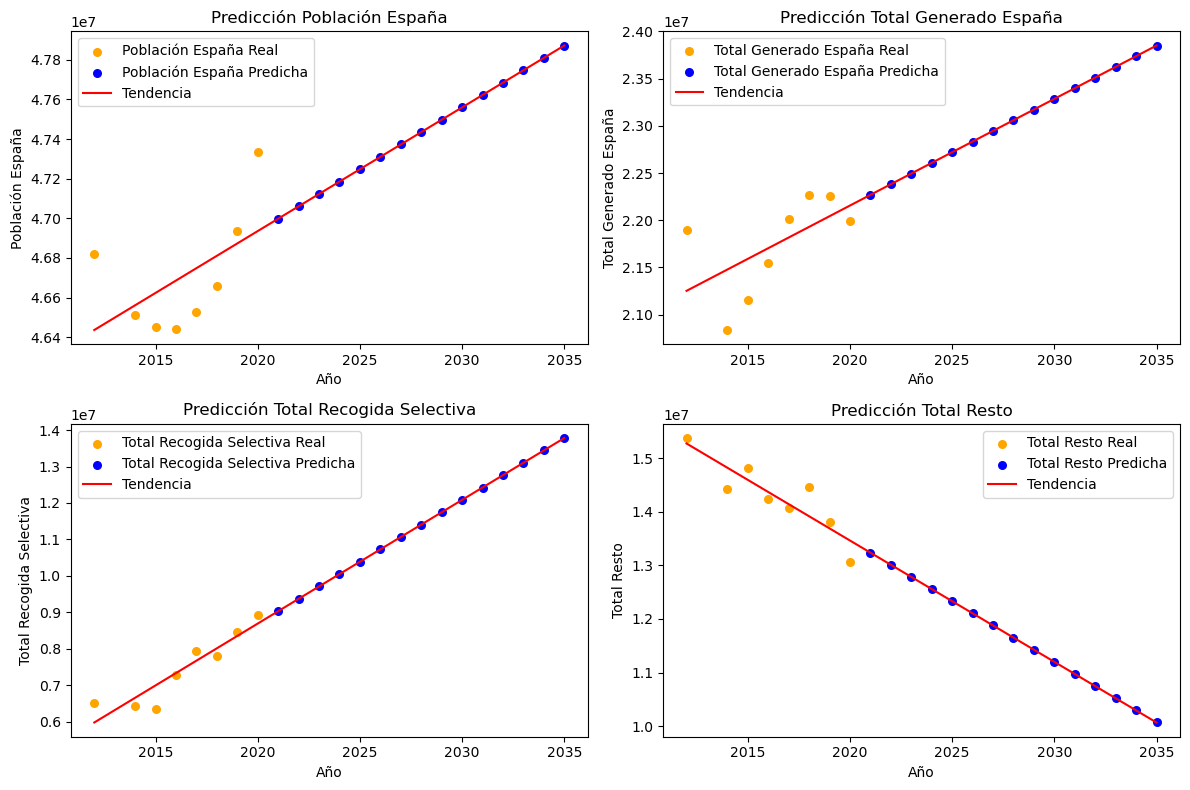

In [113]:
# GRÁFICAS PARA MOSTRAR LOS DATOS REALES CON LOS DATOS PREDICHOS Y SU LINEA DE TENDENCIA. 
import matplotlib.pyplot as plt

# Colores y tamaño
colores = ['orange', 'blue']
tamanios = [30, 60]

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

variables = [
    ('Población España', poblacion, predicted_poblacion),
    ('Total Generado España', total_generado, predicted_total_generado),
    ('Total Recogida Selectiva', total_recogida_selectiva, predicted_total_recogida_selectiva),
    ('Total Resto', total_resto, predicted_total_resto)
]

for i, (variable, real, predicted) in enumerate(variables):
    ax = axs[i // 2, i % 2]
    ax.scatter(years, real, c=colores[0], s=tamanios[0], label=f'{variable} Real')
    ax.scatter(future_years, predicted, c=colores[1], s=tamanios[0], label=f'{variable} Predicha')

    # Ajuste de regresión lineal
    data = list(zip(years, real)) + list(zip(future_years, predicted))
    data.sort()  # Ordenar por años
    x, y = zip(*data)  # Desempaquetar los pares (x, y)

    coefs = np.polyfit(x, y, 1)
    line = np.poly1d(coefs)
    x_line = np.linspace(min(x), max(future_years), 100)
    y_line = line(x_line)

    # Línea de tendencia
    ax.plot(x_line, y_line, c='red', label='Tendencia')

    # Personalizar el gráfico
    ax.set_xlabel('Año')
    ax.set_ylabel(variable)
    ax.set_title(f'Predicción {variable}')
    ax.legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()
